# iris dataset

- 50 samples of 3 different species of iris (150 samples total)
- Measurements: sepal length, sepal width, petal length, petal width
- supervised learning problem
- **Classification** problem since target is categorical
- 150 **instances**
- 4 **features** (sepal length, sepal width, petal length, petal width)
- **target** variable is the iris species
- More information in the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Iris)

## Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
iris = load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


## Train, val, Test split

In [5]:
from sklearn.model_selection import train_test_split
X_train_1, X_test, y_train_1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_1, y_train_1, test_size=0.2, random_state=42)

In [7]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(96, 4)
(24, 4)
(30, 4)
(96,)
(24,)
(30,)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_prep = scaler.fit_transform(X_train)
X_val_prep = scaler.fit_transform(X_val)
X_train_1_prep = scaler.fit_transform(X_train_1)

## create models

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [10]:
models = [('log_reg', LogisticRegression()), ('tree_clf', DecisionTreeClassifier()),
         ('forest_clf', RandomForestClassifier()), ('svm_clf', SVC(probability= True)),
         ('sgd' ,SGDClassifier())]
results= []
names= []
evale= []
cme= []
for name, model in models:
    model.fit(X_train_prep, y_train)
    joblib.dump(model, name +'.pkl')
    accuracy= model.score(X_train_prep, y_train)*100
    val_accuracy= model.score(X_val_prep, y_val)*100
    cv= cross_val_score(model, X_train_prep, y_train,
                            scoring='accuracy', cv=10)
    results.append([accuracy, cv])
    names.append(name)
    eval= "%s:\t%f\t%f\t%f (%f)" % (name, accuracy, val_accuracy, cv.mean()*100, cv.std()*100)
    evale.append(eval)
    y_pred = model.predict(X_val_prep)
    c_matrix = confusion_matrix(y_val, y_pred)
    cme.append([name, c_matrix])

C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver 

In [11]:
print("""\t\t training\t validating
NAME\t\t ACCURACY\tACCURACY\t CV_MEAN (CV_STD)""")
print('='*75)
for eval in evale:
    print(eval)
    print('='*75)

		 training	 validating
NAME		 ACCURACY	ACCURACY	 CV_MEAN (CV_STD)
log_reg:	89.583333	66.666667	88.404040 (9.954165)
tree_clf:	100.000000	91.666667	90.424242 (13.371296)
forest_clf:	100.000000	87.500000	93.555556 (11.042007)
svm_clf:	98.958333	91.666667	95.979798 (6.666942)
sgd:	91.666667	70.833333	83.161616 (10.202325)


In [12]:
for cm in cme:
    print(cm)
    print('='*75)

['log_reg', array([[7, 1, 0],
       [0, 4, 7],
       [0, 0, 5]], dtype=int64)]
['tree_clf', array([[8, 0, 0],
       [0, 9, 2],
       [0, 0, 5]], dtype=int64)]
['forest_clf', array([[8, 0, 0],
       [0, 8, 3],
       [0, 0, 5]], dtype=int64)]
['svm_clf', array([[8, 0, 0],
       [0, 9, 2],
       [0, 0, 5]], dtype=int64)]
['sgd', array([[7, 1, 0],
       [1, 5, 5],
       [0, 0, 5]], dtype=int64)]


#### from this the SVM classifier did best

In [13]:
k_range = list(range(1, 50))
scores = []
cv_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_prep, y_train)
    y_pred = knn.predict(X_val_prep)
    scores.append(metrics.accuracy_score(y_val, y_pred))
    cv = cross_val_score(knn, X_train_prep, y_train, cv=10, scoring='accuracy')
    cv_scores.append(cv.mean())

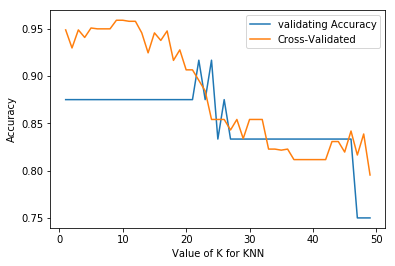

In [14]:
# plot the relationship between K and validating accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
# plot the relationship between K and Cross-Validated Accuracy
plt.plot(k_range, cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend(['validating Accuracy', 'Cross-Validated'])

#### From this the best of the knn is k= 20

## comparing SVM to knn

In [15]:
svm_clf = joblib.load('svm_clf.pkl')
svm_clf.fit(X_train_prep, y_train)
y_pred = svm_clf.predict(X_val_prep)
accuracy= metrics.accuracy_score(y_val, y_pred)
c_matrix = confusion_matrix(y_val, y_pred)
print(accuracy*100)
print(c_matrix)

91.66666666666666
[[8 0 0]
 [0 9 2]
 [0 0 5]]


In [16]:
# print the first 25 true and predicted responses
print('True:', y_val[0:30])
print('Pred:', y_pred[0:30])

True: [1 1 0 0 0 2 1 2 2 2 1 1 1 1 1 0 2 0 1 0 1 1 0 0]
Pred: [1 1 0 0 0 2 2 2 2 2 1 2 1 1 1 0 2 0 1 0 1 1 0 0]


the only error this model is making is prediction 2 instead of 1

In [17]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_prep, y_train)
joblib.dump(knn, 'knn.pkl')
y_pred = knn.predict(X_val_prep)
knn_accuracy= metrics.accuracy_score(y_val, y_pred)
knn_c_matrix = confusion_matrix(y_val, y_pred)
print(knn_accuracy*100)
print(knn_c_matrix)

87.5
[[8 0 0]
 [0 8 3]
 [0 0 5]]


In [18]:
# print the first 25 true and predicted responses
print('True:', y_val[0:30])
print('Pred:', y_pred[0:30])

True: [1 1 0 0 0 2 1 2 2 2 1 1 1 1 1 0 2 0 1 0 1 1 0 0]
Pred: [1 1 0 0 0 2 2 2 2 2 1 2 2 1 1 0 2 0 1 0 1 1 0 0]


while this model is making a lot of errpr

In [19]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
y_probas_knn = cross_val_predict(knn, X_train, y_train_5, cv=3,
 method="predict_proba")
y_scores_knn = y_probas_knn[:, 1] # score = proba of positive class
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train_prep,y_scores_knn)
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_knn, tpr_knn, "knn")
plt.legend(loc="bottom right")
plt.show()

NameError: name 'roc_curve' is not defined

### our model is therefore SVM

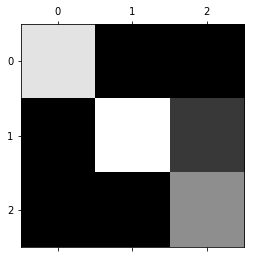

In [20]:
#lets take a look at image representation of the confusion matrix for RandomForestClassifier Model
#using the matplotlib's matshow() function

plt.matshow(c_matrix, cmap=plt.cm.gray)

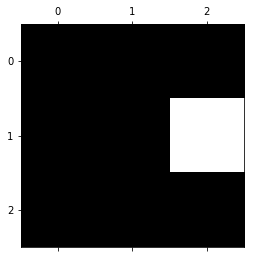

In [21]:
#focusing on only the errors
row_sums = c_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = c_matrix / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

from the representation shown above it shows that the RandomForestClassifier generalizes well and it is only making error on predicting 2 confusing it to be 1

In [22]:
from sklearn.metrics import classification_report 
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.73      0.84        11
           2       0.62      1.00      0.77         5

   micro avg       0.88      0.88      0.88        24
   macro avg       0.88      0.91      0.87        24
weighted avg       0.92      0.88      0.88        24



we have 88% and we want to get at least 90%


Text(0, 0.5, 'Frequency')

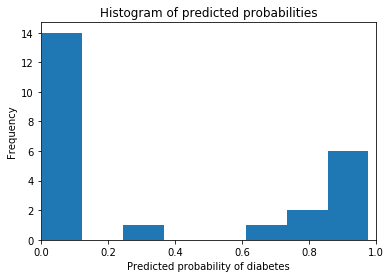

In [24]:
y_pred_prob = svm_clf.predict_proba(X_val_prep)[:, 1]
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [ ]:
from sklearn.metrics import precision_recall_curve

y_proba = cross_val_predict(svm_clf, X_val_prep, y_val, cv=5,
                                           method='predict_proba')
y_scores = y_proba[:, 1]# gets the positive probabilities

precisions, recalls, thresholds = precision_recall_curve(y_val, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.xlabel('Threshold')
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.legend(fontsize=20)
    plt.grid()

    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [26]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc_curve')
plot_roc_curve(fpr, tpr)
plt.show()

ValueError: multiclass format is not supported

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X, y = iris.data, iris.target

y = label_binarize(y, classes=[0,1,2])
n_classes = 3

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [33]:

y_predict_proba = svm_clf.predict_proba(X_val_prep)

# Compute ROC curve and ROC AUC for each class
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
all_y_val_i = np.array([])
all_y_predict_proba = np.array([])
for i in range(n_classes):
    y_val_i = map(lambda x: 1 if x == i else 0, y_val)
    all_y_val_i = np.concatenate([all_y_val_i, y_val_i])
    all_y_predict_proba = np.concatenate([all_y_predict_proba, y_predict_proba[:, i]])
    fpr[i], tpr[i], _ = roc_curve(y_val_i, y_predict_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["average"], tpr["average"], _ = roc_curve(all_y_val_i, all_y_predict_proba)
roc_auc["average"] = auc(fpr["average"], tpr["average"])


# Plot average ROC Curve
plt.figure()
plt.plot(fpr["average"], tpr["average"],
         label='Average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["average"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot each individual ROC curve
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
 

ValueError: all the input arrays must have same number of dimensions

In [ ]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

## good model

In [ ]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

param_grid = [ {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]

svm_clf = joblib.load('svm_clf.pkl')
grid_search = GridSearchCV(svm_clf, param_grid, cv=5,
 scoring='accuracy') 
grid_search.fit(X_train_prep, y_train)

In [30]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
param_grid = [{'gamma': [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8],
                     'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    grid_search = GridSearchCV(svm_clf, param_grid, cv=5,
                       scoring='%s_macro' % score)
    grid_search.fit(X_train_prep, y_train)

    print(np.sqrt(-(grid_search.best_score_)))
    print(grid_search.best_params_)
    print(grid_search.best_estimator_)

# Tuning hyper-parameters for precision



C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metric

nan
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
# Tuning hyper-parameters for recall

nan
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


In [ ]:
print(np.sqrt(-(grid_search.best_score_)))
print(grid_search.best_params_)
print(grid_search.best_estimator_)